**ML_Assignment_2_EDA_and_Preprocessing**

*Install & Import Necessary Libraries*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

*Load Dataset from Google Drive*

In [3]:

# Correct Google Drive link format
file_id = "1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_"  # Replace with your actual file ID
url = f"https://drive.google.com/uc?id={file_id}"

# Load the dataset
df = pd.read_csv(url)
print(df.head())

   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0


*Data Exploration*

In [4]:
# Display basic dataset information
print("\nDataset Info:")
print(df.info())

print("\nUnique Values in Each Feature:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

print("\nStatistical Summary:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB
None

Unique Values in Each Feature:
Company: 6
Age: 29
Salary: 40
Place: 11
Country: 1
Gender: 2

Statistical Summary:
              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [5]:
# Renaming columns (Update column names if needed)
df.rename(columns={'Salary': 'Income'}, inplace=True)  # 🔴 Change as required

In [6]:
# Display first few rows to verify changes
print("\nFirst Few Rows After Renaming:")
print(df.head())



First Few Rows After Renaming:
   Company   Age  Income     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0


*Data Cleaning*

In [7]:

# Convert numeric columns properly
df = df.apply(pd.to_numeric, errors='coerce')


# Identify missing values
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())






Missing Values Before Cleaning:
Company    148
Age         18
Income      24
Place      148
Country    148
Gender       0
dtype: int64


In [8]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Replace '0' in 'Age' with NaN
if 'Age' in df.columns:
    df['Age'] = df['Age'].replace(0, np.nan)

# Handle missing values (fill with mean/median/mode)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Income'] = df['Income'].fillna(df['Income'].mean())


In [9]:
# Fill missing categorical values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if not df[col].mode().dropna().empty:
        df[col] = df[col].fillna(df[col].mode()[0])

# Convert numeric columns properly
numeric_cols = df.select_dtypes(include=['number']).columns  
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [10]:
# IQR Outlier Detection
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers column-wise
for col in numeric_cols:
    df = df[(df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col])]

# Display dataset info after cleaning
print("\nDataset Info After Cleaning:")
print(df.info())

# Save cleaned data
df.to_csv("cleaned_data.csv", index=False)
print("\nData Cleaning Completed Successfully!")



Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  0 non-null      float64
 1   Age      0 non-null      float64
 2   Income   0 non-null      float64
 3   Place    0 non-null      float64
 4   Country  0 non-null      float64
 5   Gender   0 non-null      int64  
dtypes: float64(5), int64(1)
memory usage: 0.0 bytes
None

Data Cleaning Completed Successfully!


*Data Analysis*



Filtered Data:
Empty DataFrame
Columns: [Company, Age, Income, Place, Country, Gender]
Index: []


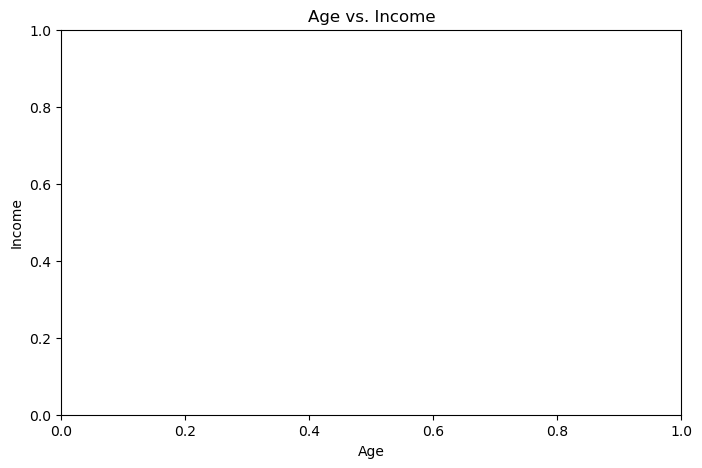

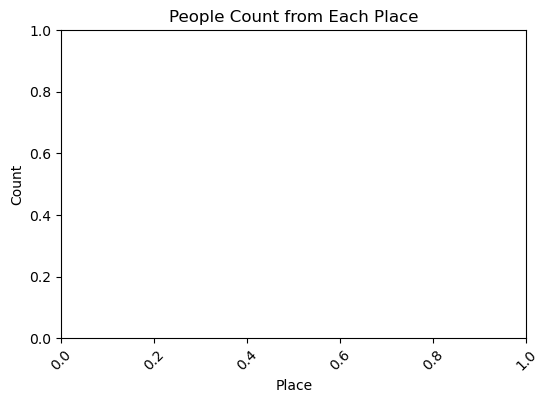

In [30]:
# Filter data where Age > 40 and Salary < 5000
filtered_df = df[(df['Age'] > 40) & (df['Income'] < 5000)]
print("\nFiltered Data:")
print(filtered_df)

# Plot Age vs. Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(data=filtered_df, x='Age', y='Income', color='blue', s=100)
plt.title('Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# Count and visualize people from each place
place_counts = df['Place'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=place_counts.index, y=place_counts.values, palette='viridis')
plt.title('People Count from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


*Data Encoding*

In [35]:
# Label Encoding for categorical variables
label_encoder = LabelEncoder()
df['Place_label'] = label_encoder.fit_transform(df['Place'])

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Place'], drop_first=True)

print("\nData after Encoding:")
print(df_encoded.head())



Data after Encoding:
Empty DataFrame
Columns: [Company, Age, Income, Country, Gender, Place_label]
Index: []


*Feature Scaling*

In [53]:
# Ensure no NaN values in numerical columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Re-check if dataframe is empty
if df.shape[0] == 0:
    print("Error: Dataframe is empty after filtering. Please check the filtering conditions.")
else:
    # Apply StandardScaler
    scaler = StandardScaler()
    df_standard = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

    # Apply MinMaxScaler
    minmax_scaler = MinMaxScaler()
    df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

    print("Scaling Successful!")


Error: Dataframe is empty after filtering. Please check the filtering conditions.
